In [73]:
"""Resources:
1-真香！利用 Shap 可完美实现机器学习模型输出可视化！ https://blog.csdn.net/weixin_38037405/article/details/118341218 

2-Unveiling the Black Box-XAI(Lime, Shap)    MAINLY REFERENCE
https://www.analyticsvidhya.com/blog/2020/10/unveiling-the-black-box-model-using-explainable-ai-lime-shap-industry-use-case/

3- Explainable AI (XAI) with SHAP -Multi-Class Classification Problem
https://towardsdatascience.com/explainable-ai-xai-with-shap-multi-class-classification-problem-64dd30f97cea
"""

'Resources:\n1-真香！利用 Shap 可完美实现机器学习模型输出可视化！ https://blog.csdn.net/weixin_38037405/article/details/118341218 \n\n2-Unveiling the Black Box-XAI(Lime, Shap)    MAINLY REFERENCE\nhttps://www.analyticsvidhya.com/blog/2020/10/unveiling-the-black-box-model-using-explainable-ai-lime-shap-industry-use-case/\n\n3- Explainable AI (XAI) with SHAP -Multi-Class Classification Problem\nhttps://towardsdatascience.com/explainable-ai-xai-with-shap-multi-class-classification-problem-64dd30f97cea\n'

In [74]:
"""
MAIN REFERENCES/RESOURCES

1-机器学习模型可解释性的详尽介绍 机器之心 - https://www.jiqizhixin.com/articles/2019-10-30-9

2-League of Legends Win Prediction with XGBoost
https://slundberg.github.io/shap/notebooks/League%20of%20Legends%20Win%20Prediction%20with%20XGBoost.html

"""

'\nMAIN REFERENCES/RESOURCES\n\n1-机器学习模型可解释性的详尽介绍 机器之心 - https://www.jiqizhixin.com/articles/2019-10-30-9\n\n2-League of Legends Win Prediction with XGBoost\nhttps://slundberg.github.io/shap/notebooks/League%20of%20Legends%20Win%20Prediction%20with%20XGBoost.html\n\n'

In [75]:
# math
import numpy as np
import pandas as pd
pd.options.display.max_columns = None

# models
from sklearn.model_selection import train_test_split
#from rulefit import RuleFit
from xgboost.sklearn import XGBClassifier


# visual
import matplotlib.pyplot as plt
from xgboost import plot_tree
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

# utils
import random
SEED = 42
random.seed(SEED)
import warnings
warnings.filterwarnings('ignore')

# explainability 
import shap
# print the JS visualization code to the notebook
shap.initjs()

In [76]:
# generate two class dataset
df = pd.read_csv("10476 - 15 features.csv")

df=df.drop(['No'],axis=1)
# Split target and features


## Split the data
X = df.drop(['stroke'], axis=1)
features = X.columns
y = df['stroke'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=SEED, stratify = y)

In [77]:
# XGBoost
cls = XGBClassifier(learning_rate=0.01, n_estimators=1000, silent=0, gamma=0.2, subsample=0.75, 
                       objective='binary:logistic', reg_alpha=1, reg_lambda=1,seed=27,
                      max_depth=5, min_child_weight=1)
cls.fit(X_train,y_train)

[12:16:38] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=0, num_parallel_tree=1, random_state=27,
              reg_alpha=1, reg_lambda=1, scale_pos_weight=1, seed=27, silent=0,
              subsample=0.75, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [78]:
# LIME 

"""This is a model agnostic approach, which means it is applicable to any model in order to 
produce explanations for predictions.

"""

## Using Lime to make decision

'This is a model agnostic approach, which means it is applicable to any model in order to \nproduce explanations for predictions.\n\n'

In [79]:
from lime.lime_tabular import LimeTabularExplainer

In [80]:
#instantiate the explanations for the data set
limeexplainer = LimeTabularExplainer(X_test.values, class_names=['IS absent','IS present'], feature_names = X_test.columns, discretize_continuous = True)
idx=8 # the rows of the dataset
explainable_exp = limeexplainer.explain_instance(X_test.values[idx], cls.predict_proba, num_features=6)
explainable_exp.show_in_notebook(show_all=False)

In [81]:
y_test[idx]   # the actual value for the class is 1  ## True positive

1

In [82]:
####################################################################################################################

In [83]:
idx2=0
explainable_exp2 = limeexplainer.explain_instance(X_test.values[idx2], cls.predict_proba, num_features=6)
explainable_exp2.show_in_notebook(show_all=False)

In [84]:
y_test[idx2] # True negative

0

In [85]:
######################################################################################################################

In [86]:
idx3=1444
explainable_exp3 = limeexplainer.explain_instance(X_test.values[idx3], cls.predict_proba, num_features=6)
explainable_exp3.show_in_notebook(show_all=False)

In [87]:
y_test[idx3]    ## False positive, predicted IS present/positive, actual=0=negative=IS absent 

0

In [88]:
#############################################################################################################

In [89]:
idx4=1285
explainable_exp4 = limeexplainer.explain_instance(X_test.values[idx4], cls.predict_proba, num_features=6)
explainable_exp4.show_in_notebook(show_all=False)

In [90]:
y_test[idx4]  # False negative, predicted IS absent/negative, actual=1=positive=IS present 

1

In [91]:
####################################################################################################################
################################################################################################################
#############################################################################################################
##########################################################################################################

In [92]:
"""We can see the Top 6 features and the actual class our participant at index 0 belongs. 
Lime makes it more explainable to us in terms of the weight and 
values of an attribute that makes the customer interested in the Vehicle Insurance Policy."""

'We can see the Top 6 features and the actual class our participant at index 0 belongs. \nLime makes it more explainable to us in terms of the weight and \nvalues of an attribute that makes the customer interested in the Vehicle Insurance Policy.'

In [93]:
# Explain the XGBoost model using SHAPLY VALUES

"""It has optimized functions for interpreting tree-based models and 
a model agnostic explainer function for interpreting any black-box model for which the predictions are known."""

'It has optimized functions for interpreting tree-based models and \na model agnostic explainer function for interpreting any black-box model for which the predictions are known.'

In [94]:
"""Because the Tree SHAP algorithm is implemented in XGBoost we can compute exact SHAP values quickly 
over thousands of samples. The SHAP values for a single prediction (including the expected output in the last column) 
sum to the model's output for that prediction."""

"Because the Tree SHAP algorithm is implemented in XGBoost we can compute exact SHAP values quickly \nover thousands of samples. The SHAP values for a single prediction (including the expected output in the last column) \nsum to the model's output for that prediction."

In [95]:
# compute the SHAP values for every prediction in the testing dataset
explainer = shap.TreeExplainer(cls)
shap_values = explainer.shap_values(X_test)

In [96]:
### We use "LIME" and "SHAP" to make locoal intepretation respectively

In [97]:
"""
Explain a single individual's chances of having ischemic stroke

SHAP values sum to the difference between the expected output of the model and the current output for the 
current individuals. Note that for the Tree SHAP implmementation the margin output of the model is explained, 
not the trasformed output (such as a probability for logistic regression). This means that the units of 
the SHAP valuesfor this model are log odds ratios. Large positive values mean a player is likely to IS-present, 
while large negative values mean they are likely to IS-absent.

"""

"\nExplain a single individual's chances of having ischemic stroke\n\nSHAP values sum to the difference between the expected output of the model and the current output for the \ncurrent individuals. Note that for the Tree SHAP implmementation the margin output of the model is explained, \nnot the trasformed output (such as a probability for logistic regression). This means that the units of \nthe SHAP valuesfor this model are log odds ratios. Large positive values mean a player is likely to IS-present, \nwhile large negative values mean they are likely to IS-absent.\n\n"

In [98]:
shap.force_plot(explainer.expected_value, shap_values[8,:], X_test.iloc[8,:])  # True Positive

In [99]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])  # True negative

In [100]:
shap.force_plot(explainer.expected_value, shap_values[1444,:], X_test.iloc[1444,:])  # False positive

In [101]:
shap.force_plot(explainer.expected_value, shap_values[1285,:], X_test.iloc[1285,:])  # False negative

In [102]:
### Select sub-set to visualise the individuals' chances of having ischemic stroke

In [103]:
shap.force_plot(explainer.expected_value, shap_values[0:500,:], X_test.iloc[0:500,:],plot_cmap="DrDb")

In [104]:
#Summarize the impact of all features over the entire dataset

In [105]:
"""
A SHAP value for a feature of a specific prediction represents how much the model prediction changes when we 
observe that feature. 
In the summary plot below we plot all the SHAP values for a single feature on a row, where the x-axis is the SHAP value
(which for this model is in units of log odds of IS). 

By doing this for all features, we see which features drive the model's prediction a lot (such as Age), 
and which only effect the prediction a little (such as PLT). 

Note that when points don't fit together on the line they pile up vertically to show density. 
(注意，当点不在一条线上时，它们会垂直堆积以显示密度)
Each dot is also colored by the value of that feature from high to low.

"""

"\nA SHAP value for a feature of a specific prediction represents how much the model prediction changes when we \nobserve that feature. \nIn the summary plot below we plot all the SHAP values for a single feature on a row, where the x-axis is the SHAP value\n(which for this model is in units of log odds of IS). \n\nBy doing this for all features, we see which features drive the model's prediction a lot (such as Age), \nand which only effect the prediction a little (such as PLT). \n\nNote that when points don't fit together on the line they pile up vertically to show density. \n(注意，当点不在一条线上时，它们会垂直堆积以显示密度)\nEach dot is also colored by the value of that feature from high to low.\n\n"

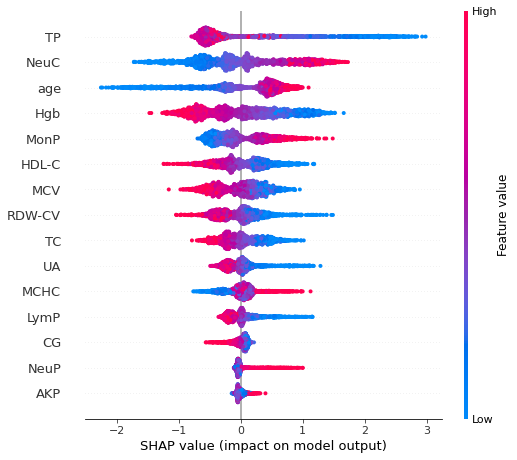

In [106]:
shap.summary_plot(shap_values, X_test)

In [107]:
# Examine how changes in a feature change the model's prediction

In [108]:
"""
The y-axis in the plots below represents the SHAP value for that feature, 
so -2 means observing that feature lowers your log odds of IS by 2, 
while a value of +2 means observing that feature raises your log odds of IS by 2.


Note that these plot just explain how the XGBoost model works, 
not nessecarily how reality works. Since the XGBoost model is trained from observational data, 
it is not nessecarily a causal model, and so just because changing a factor makes the model's prediction of IS go up, 
does not always mean it will raise your actual chances.
"""

"\nThe y-axis in the plots below represents the SHAP value for that feature, \nso -2 means observing that feature lowers your log odds of IS by 2, \nwhile a value of +2 means observing that feature raises your log odds of IS by 2.\n\n\nNote that these plot just explain how the XGBoost model works, \nnot nessecarily how reality works. Since the XGBoost model is trained from observational data, \nit is not nessecarily a causal model, and so just because changing a factor makes the model's prediction of IS go up, \ndoes not always mean it will raise your actual chances.\n"

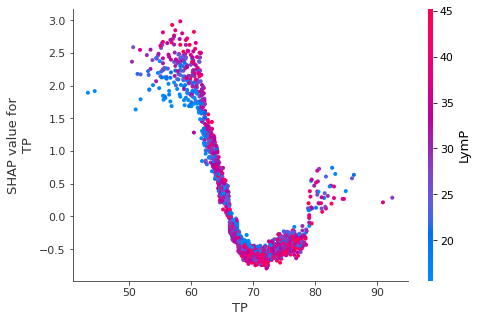

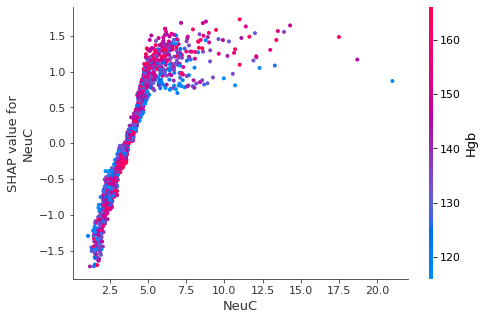

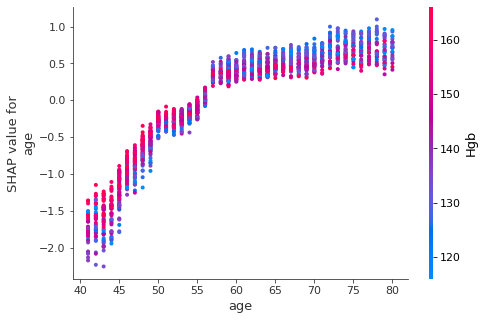

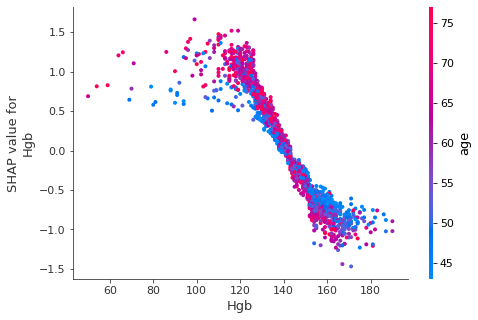

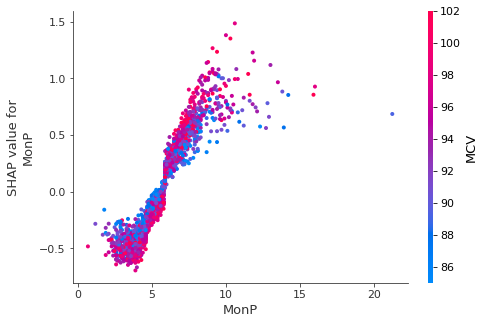

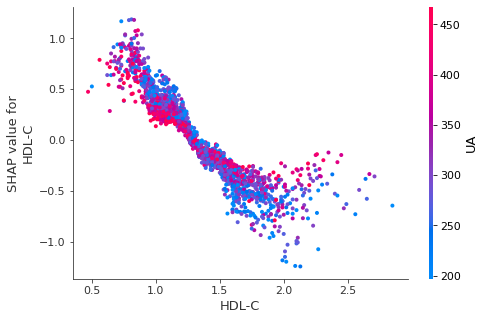

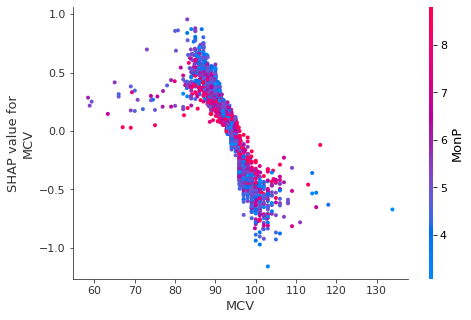

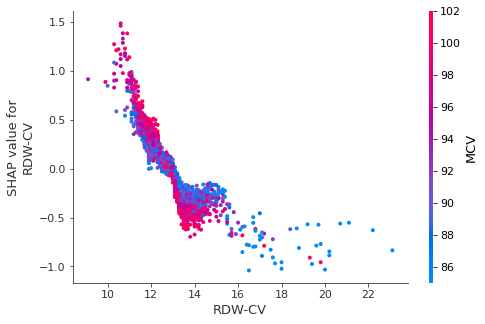

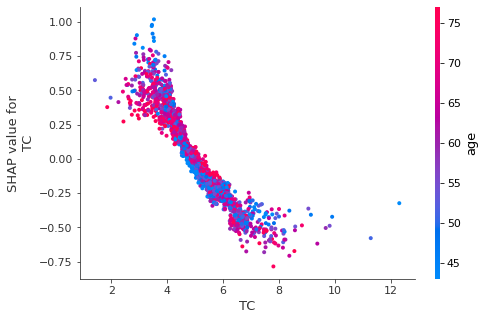

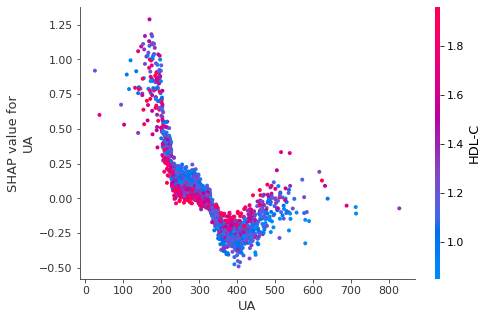

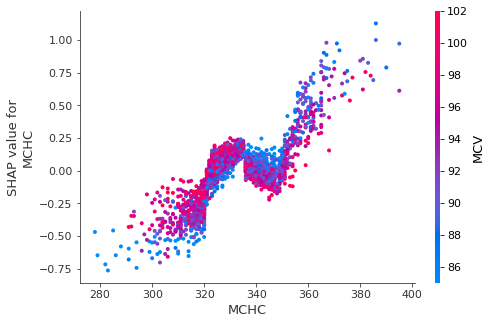

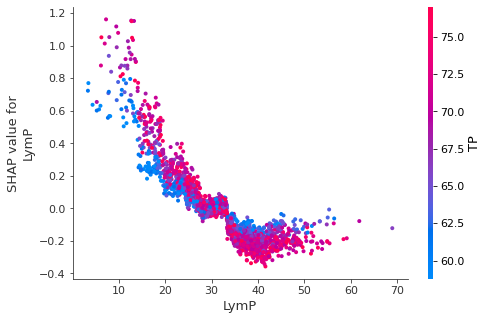

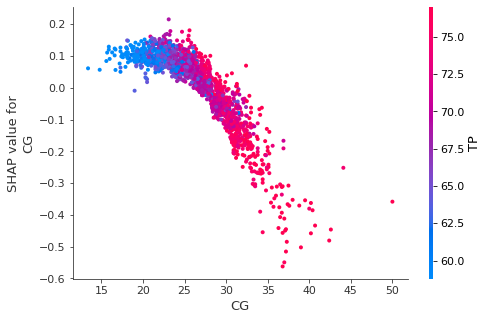

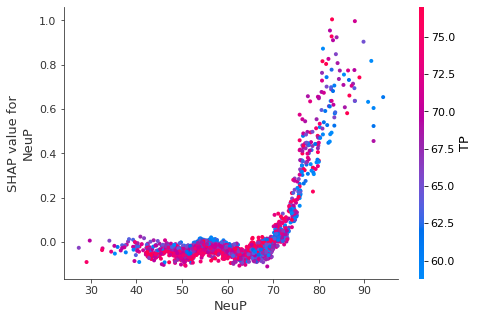

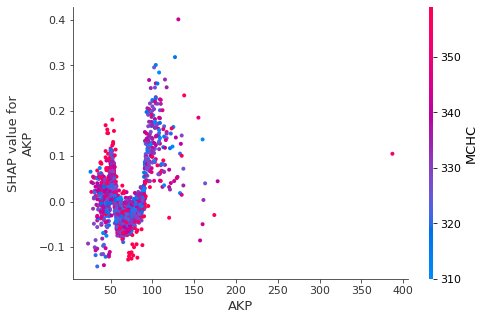

IndexError: index 15 is out of bounds for axis 0 with size 15

In [109]:
# sort the features indexes by their importance in the model
# (sum of SHAP value magnitudes over the validation dataset)
top_inds = np.argsort(-np.sum(np.abs(shap_values), 0))

# make SHAP plots of the three most important features
for i in range(20):
    shap.dependence_plot(top_inds[i], shap_values, X_test)

In [ ]:
#################################################################################################################

In [ ]:
######################################################################################################################

# The codes listed above are for the visualisation of "X_test" dataset but not for X.

#In the IS-article manuscript, the (permutation) importances were generated using X, so for the purpose of consistency
## I will process the corresponding code again for X

In [ ]:
# compute the SHAP values for every prediction in the dataset
explainer2 = shap.TreeExplainer(cls)
shap_values2 = explainer2.shap_values(X)

In [ ]:
shap.force_plot(explainer2.expected_value, shap_values2[666,:], X.iloc[666,:],plot_cmap="PkYg") 

# predicted as IS-present

## this case was successfully predicted

In [ ]:
shap.force_plot(explainer2.expected_value, shap_values2[4698:5298,:], X.iloc[4298:5298,:],plot_cmap="PkYg") 

In [ ]:
shap.summary_plot(shap_values2, X) 

"""the orders generated by this figure are different with "X_test-SHAP-feature importance, 
and also different with the orders generated by the classic feature (permutation) imporatnce,
this is because the calculation methods/equations are a little bit different"""

In [ ]:
xs = np.linspace(-5,5,100)
plt.xlabel("Log odds of IS")
plt.ylabel("Probability of IS")
plt.title("How changes in log odds convert to probability of IS")
plt.plot(xs, 1/(1+np.exp(-xs)))
plt.show()